# HW1 Solution by Jun Hao Saw

Let the probabilities of winning games A, B, and C be denoted $\theta_A$, $\theta_B$, and $\theta_C$ respectively. 

Let $(\theta_A, \theta_B, \theta_C) = (0.3, 0.5, 0.7).$

Now, assume that we no longer have any information about the probabilities of winning each game. 
This means that each parameter can take any value in $[0, 1]$. Assume that the priors of each parameter follow a uniform $\mathcal{U}_{[0,1]}$ distribution. 
I can represent $\mathcal{U}_{[0,1]}$ as a Beta(1, 1) distribution. This will be useful later since a beta distribution prior and Bernoulli distribution likelihood give a beta distribution posterior.

### Code

In [4]:
import numpy as np;from scipy import stats; import matplotlib.pyplot as plt

real_probs_dict = {'A':0.3,'B':0.5,'C':0.7}
games = ['A','B','C']

def choose_game(priorA,priorB,priorC):
    # Takes a sample of size one from the prior distributions of each game
    # Returns the game which gave the maximal sample value
    rv_A = stats.beta.rvs(a = priorA[0], b = priorA[1])
    rv_B = stats.beta.rvs(a = priorB[0], b = priorB[1])
    rv_C = stats.beta.rvs(a = priorC[0], b = priorC[1])
    return games[np.argmax([rv_A,rv_B,rv_C])]

def update_posterior(game, outcome, priorA, priorB, priorC):
    # Returns the updated prior of the game played using the outcome 
    if game=='A':
        priorA = (priorA[0] + outcome, priorA[1] + 1 - outcome)
    elif game=='B':
        priorB = (priorB[0] + outcome, priorB[1] + 1 - outcome)
    elif game=='C':
        priorC = (priorC[0] + outcome, priorC[1] + 1 - outcome)
    return priorA, priorB, priorC

def apply_strategy_once(priorA, priorB, priorC):
    # Choose which game to play
    game = choose_game(priorA, priorB, priorC)
    # Determine the outcome of the game
    outcome = stats.bernoulli(p = real_probs_dict[game]).rvs(size = 1)
    # Update our prior belief about the winning probability of the game
    priorA, priorB, priorC = update_posterior(game, outcome, priorA, priorB, priorC)
    
    return game, priorA, priorB, priorC

priorA,priorB,priorC = (1,1),(1,1),(1,1)
for i in range(100):
    game,priorA,priorB,priorC = apply_strategy_once(priorA,priorB,priorC)
    #print('The game chosen is', game, priorA,priorB,priorC)

The game chosen is C (1, 1) (1, 1) (array([2]), array([1]))
The game chosen is C (1, 1) (1, 1) (array([2]), array([2]))
The game chosen is C (1, 1) (1, 1) (array([3]), array([2]))
The game chosen is B (1, 1) (array([1]), array([2])) (array([3]), array([2]))
The game chosen is A (array([1]), array([2])) (array([1]), array([2])) (array([3]), array([2]))
The game chosen is B (array([1]), array([2])) (array([2]), array([2])) (array([3]), array([2]))
The game chosen is C (array([1]), array([2])) (array([2]), array([2])) (array([4]), array([2]))
The game chosen is C (array([1]), array([2])) (array([2]), array([2])) (array([5]), array([2]))
The game chosen is C (array([1]), array([2])) (array([2]), array([2])) (array([6]), array([2]))
The game chosen is C (array([1]), array([2])) (array([2]), array([2])) (array([6]), array([3]))
The game chosen is C (array([1]), array([2])) (array([2]), array([2])) (array([6]), array([4]))
The game chosen is A (array([1]), array([3])) (array([2]), array([2]))

Note that when the strategy is applied a large number of times, the only game that eventually ends up being selected is C. This makes sense since the probability of winning game C is the highest.

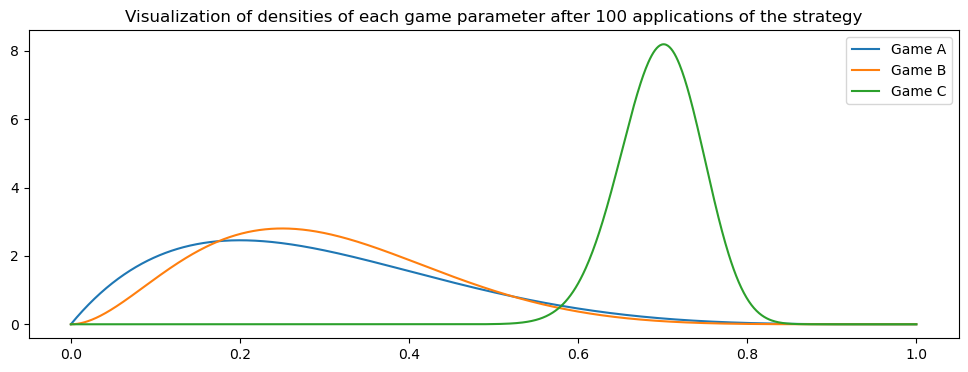

In [7]:
parameter_domain = np.linspace(0,1,1001)

pdfA = stats.beta(a=priorA[0],b=priorA[1]).pdf(parameter_domain)
pdfB = stats.beta(a=priorB[0],b=priorB[1]).pdf(parameter_domain)
pdfC = stats.beta(a=priorC[0],b=priorC[1]).pdf(parameter_domain)

plt.figure(figsize=(12,4)); plt.plot(parameter_domain, pdfA, label="Game A"); plt.plot(parameter_domain, pdfB, label="Game B"); plt.plot(parameter_domain, pdfC, label="Game C"); plt.legend(); plt.title("Visualization of densities of each game parameter after 100 applications of the strategy"); 